In [1]:
import pandas as pd
import numpy as np
from math import log
from matplotlib import pyplot as plt

## Text content 기반 추천 시스템 순서
1. 문장을 벡터화한다(TF-IDF)
1. 모든 문장들의 유사도를 계산한다. (cosine)
1. 나를 제외한 가장 유사한 문장들로 정렬한다.

### TF-IDF 실습

문서 내 단어의 빈도수에 해당 단어가 등장한 문서 빈도의 역수를 함께 계산한 것.   
-> **다른 문서에서도 많이 등장한 단어면 가중치가 낮고, 다른 문서에서 많이 등장하지 않은 단어면 가중치가 높은 단어**.    

빈도는 낮을지 몰라도 다른 문서에서 언급되지 않은 단어라면 그 단어는 해당 문서의 아이덴티티일 수 있다.

In [6]:
docs = [
  'I like a red apple',
  'the color of the banana is yellow',
  'long and yellow sweet banana',
  'I like fruits. especially apple and banana'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [7]:
N = len(docs) 

def tf(t, d):
    words_set = d.split(' ')
    return words_set.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [11]:
# TF(Term Frequency) table : 빈도
result = []
for i in range(N): 
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))
tf_df = pd.DataFrame(result, columns = vocab)

# IDF(Inverse Document Frequency) Table : 희소성
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
idf_df = pd.DataFrame(result, index=vocab, columns=["IDF"])

# TF-IDF 테이블(벡터화) 구하기
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))
tfidf_df = pd.DataFrame(result, columns = vocab)
tfidf_df


,I,a,and,apple,banana,color,especially,fruits.,is,like,long,of,red,sweet,the,yellow
0,0.287682,-0.223144,0.000000,0.287682,0.0,0.000000,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000
1,0.000000,-0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,1.386294,0.287682
2,0.000000,-0.000000,0.287682,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.287682
3,0.287682,-0.000000,0.287682,0.287682,0.0,0.000000,0.693147,0.693147,0.000000,0.287682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### sklearn님의 힘을 빌려서 동일한 작업 후 similarity 구하기

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
  'I like a red apple',
  'the color of the banana is yellow',
  'long and yellow sweet banana',
  'I like fruit especially apples and bananas'
] 

# 4개 문장 벡터화
tfidfv = TfidfVectorizer().fit(docs)
rfidf_arr = tfidfv.transform(docs).toarray()
rfidf_arr

array([[0.        , 0.61761437, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.48693426,
        0.        , 0.        , 0.61761437, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.27460308, 0.        ,
        0.34829919, 0.        , 0.        , 0.34829919, 0.        ,
        0.        , 0.34829919, 0.        , 0.        , 0.69659839,
        0.27460308],
       [0.40104275, 0.        , 0.        , 0.40104275, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.50867187, 0.        , 0.        , 0.50867187, 0.        ,
        0.40104275],
       [0.34431452, 0.        , 0.43671931, 0.        , 0.43671931,
        0.        , 0.43671931, 0.43671931, 0.        , 0.34431452,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

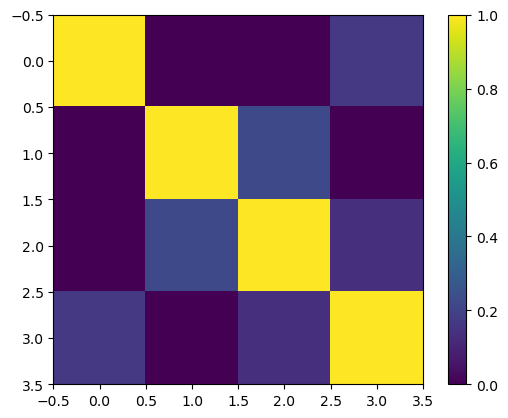

array([[1.        , 0.        , 0.        , 0.16765854],
       [0.        , 1.        , 0.22025515, 0.        ],
       [0.        , 0.22025515, 1.        , 0.13808484],
       [0.16765854, 0.        , 0.13808484, 1.        ]])

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# 위에서 벡터화 한 4개 문장 행렬의 다른 문장들과의 similarity 계산.
cos_matrix = cosine_similarity(rfidf_arr, rfidf_arr)
plt.imshow(cos_matrix)
plt.colorbar()
plt.show()
cos_matrix

In [19]:
# 1번 인덱스 문장과 가장 유사한 문장 순서대로 index 출력하기
my_index = 1
sim_sorted_idx_arr = np.argsort(cos_matrix[my_index], axis=0)[::-1][1:]
sim_sorted_idx_arr

array([2, 3, 0], dtype=int64)

### kaggle movie 데이터로 text content 기반 추천 시스템 해보기
영화의 설명이 비슷한 영화 추천

#### 1. 문장을 벡터화한다(TF-IDF)

In [24]:
m_df = pd.read_csv('..\dataset\movies_metadata.csv', low_memory = False)[['id', 'title', 'overview']]
m_df.head()

,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [25]:
m_df.isna().sum()

id            0
title         6
overview    954
dtype: int64

In [49]:
m_df = m_df.dropna()

print(len(m_df))
## 중복 제거!!! 항상 조심하자
m_df = m_df.drop_duplicates()
print(len(m_df))

# 제목이랑 오버뷰도 중복인게 있다...
# 비어 있거나 No overview 이런거 있을수도 있음. 제거하고 해야 한다.
print(m_df.nunique())

44476
44476
id          44476
title       41371
overview    44303
dtype: int64


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# max_features : 빈도 높은 3만개만 남기고 나머지는 버림
tfidf = TfidfVectorizer(max_features = 30000)
ov_vec = tfidf.fit_transform(m_df['overview'])
# ov_vec은 sparse matrix, 지금은 쓸 줄 모르니까 array로 바꿔서 사용
# toarray하면 짱느리다... 일단 빼고 하자
# ov_vec = ov_vec.toarray()
ov_vec.shape

(44476, 30000)

#### 2. 모든 문장들의 유사도를 계산한다. (cosine)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(ov_vec, ov_vec)

cos_sim_df = pd.DataFrame(cosine_sim, index = m_df.title , columns=m_df.title)
cos_sim_df

#### 3. 나를 제외한 가장 유사한 문장들로 정렬한다.

In [56]:
# Toy Story와 설명이 가장 유사한 영화 제목을 보고 싶어 !
m_name = 'Toy Story'
cos_sim_df[m_name].sort_values(ascending = False).head(11)

title
Toy Story                                       1.000000
Toy Story 3                                     0.502721
Toy Story 2                                     0.449972
The 40 Year Old Virgin                          0.296734
Small Fry                                       0.290393
Andy Hardy's Blonde Trouble                     0.250000
Hot Splash                                      0.225455
Andy Kaufman Plays Carnegie Hall                0.221157
Superstar: The Life and Times of Andy Warhol    0.214194
The Champ                                       0.210951
Andy Peters: Exclamation Mark Question Point    0.208743
Name: Toy Story, dtype: float64

In [59]:
cos_sim_df['Toy Story']

title
Toy Story                      1.000000
Jumanji                        0.031322
Grumpier Old Men               0.013096
Waiting to Exhale              0.016329
Father of the Bride Part II    0.031410
                                 ...   
Subdue                         0.005728
Century of Birthing            0.021088
Betrayal                       0.009616
Satan Triumphant               0.036064
Queerama                       0.019603
Name: Toy Story, Length: 44476, dtype: float64